# EDA

## Import Software Libraries

In [1]:
import sys

# multidimensional array
import numpy as np

# manipulation and analyze data
import pandas as pd
import pickle as pkl

# advance mathematical function
import scipy as sp
from scipy import stats

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# feature engineering and machine learning algorithm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# encode data and surpress warnings
import category_encoders as ce
import warnings

# summries software libraries used
print("Library yang terpakai di prpject ini")
print(" - Python {}", format(sys.version))
print(" - Numpy {}", format(np.__version__))
print(" - Pandas {}", format(pd.__version__))
print(" - Scipy {}", format(sp.__version__))
print(" - Matplotlib {}", format(matplotlib.__version__))
print(" - Seaborn {}", format(sns.__version__))
print(" - Sklearn {}", format(sklearn.__version__))
print(" - Category Encoders {}", format(ce.__version__))

Library yang terpakai di prpject ini
 - Python {} 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
 - Numpy {} 1.21.5
 - Pandas {} 1.4.4
 - Scipy {} 1.9.1
 - Matplotlib {} 3.5.2
 - Seaborn {} 0.11.2
 - Sklearn {} 1.0.2
 - Category Encoders {} 2.5.1.post0


In [2]:
dataUser = pd.read_pickle("users_data_cleaned.pickle")
dataUser.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


## Day 2 Activity

In [3]:
dataUser.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [4]:
dataUser.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
dataUser.corr().abs()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,0.163409,0.008813,0.138838,0.030429,0.075319,0.017220,0.026431,0.030751,0.023046,0.053390
total_amount_usd,0.163409,1.000000,0.095839,0.065390,0.066857,0.084526,0.022586,0.017274,0.006435,0.016952,0.050785
age,0.008813,0.095839,1.000000,0.017875,0.185552,0.015641,0.004645,0.004767,0.023745,0.001297,0.025168
default,0.138838,0.065390,0.017875,1.000000,0.006020,0.077232,0.010017,0.016819,0.029982,0.018331,0.022421
housing,0.030429,0.066857,0.185552,0.006020,1.000000,0.041341,0.005041,0.023583,0.124197,0.037087,0.139161
loan,0.075319,0.084526,0.015641,0.077232,0.041341,1.000000,0.012395,0.009972,0.022762,0.011048,0.068193
duration,0.017220,0.022586,0.004645,0.010017,0.005041,0.012395,1.000000,0.084551,0.001549,0.001213,0.394549
campaign,0.026431,0.017274,0.004767,0.016819,0.023583,0.009972,0.084551,1.000000,0.088636,0.032860,0.073179
pdays,0.030751,0.006435,0.023745,0.029982,0.124197,0.022762,0.001549,0.088636,1.000000,0.454817,0.103616
previous,0.023046,0.016952,0.001297,0.018331,0.037087,0.011048,0.001213,0.032860,0.454817,1.000000,0.093232


In [6]:
skewDU = dataUser.skew()

print(skewDU)

number_transactions     2.704543
total_amount_usd        8.596128
age                     0.684861
default                 7.245206
housing                -0.224686
loan                    1.852545
duration                3.144556
campaign                4.898555
pdays                   2.615635
previous               41.845672
term_deposit            2.383403
dtype: float64


/var/folders/zf/f36v_nvj1h925sz3pzwpv6s00000gn/T/ipykernel_1663/1560073417.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewDU = dataUser.skew()


In [7]:
dataUser.kurtosis()

/var/folders/zf/f36v_nvj1h925sz3pzwpv6s00000gn/T/ipykernel_1663/3916952619.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataUser.kurtosis()


number_transactions       6.659034
total_amount_usd        150.790967
age                       0.319760
default                  50.495241
housing                  -1.949602
loan                      1.431987
duration                 18.155941
campaign                 39.248145
pdays                     6.934713
previous               4506.684640
term_deposit              3.680770
dtype: float64

## Generate a box plot for age

In [8]:
dataUser['age'].describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

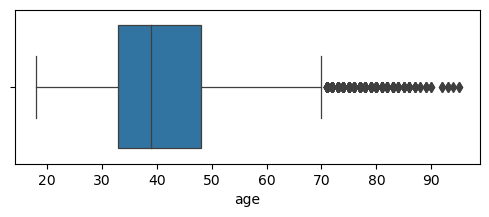

In [11]:
plt.figure(figsize=(6,2))
sns.boxplot(x=dataUser['age'], linewidth=0.9);

box plot di atas menunjukkan bahwa:
1. nilai terendah berada di bawah 20, nilai teratas 70 (hal ini aneh karena describe menunjukkan nilai max = 95, hal ini terjadi karena ada data yang mengumpul dan ada yang berada di nilai yang tinggi, Solusi: sampaikan ke user kedua kondisi ini). 
2. nilai median mendekati 40 (kisaran 38-39)


## Generate Violin

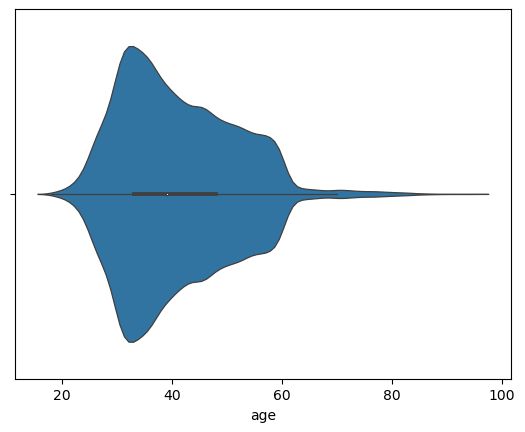

In [12]:
sns.violinplot(x= dataUser['age'], linewidth=0.9);

1. titik di tengah violin artinya median
2. tingkat probabilitas strong (high terhadap density alias jarak ) pada angka 30an

## box plot for number transaction

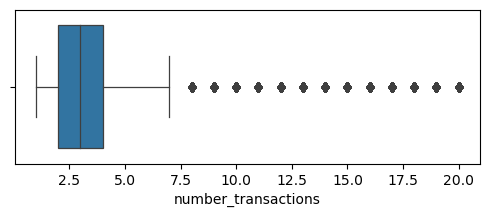

In [13]:
plt.figure(figsize=(6,2))
sns.boxplot(x=dataUser['number_transactions'], linewidth=0.9);

## line plot for total amount usd

supaya tahu tren dari total amount usd

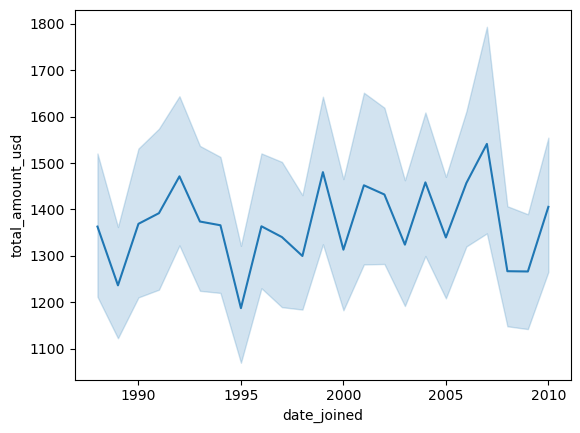

In [15]:
years = dataUser['date_joined'].dt.year

sns.lineplot(data=dataUser, x = years, y='total_amount_usd', estimator=np.mean);

## generate scatter plot comparing to total_amount_usd to number_transaction

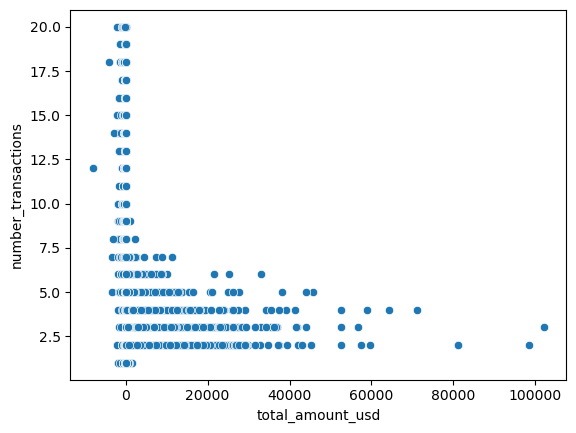

In [17]:
sns.scatterplot(data=dataUser, x = 'total_amount_usd', y='number_transactions', estimator=np.mean);

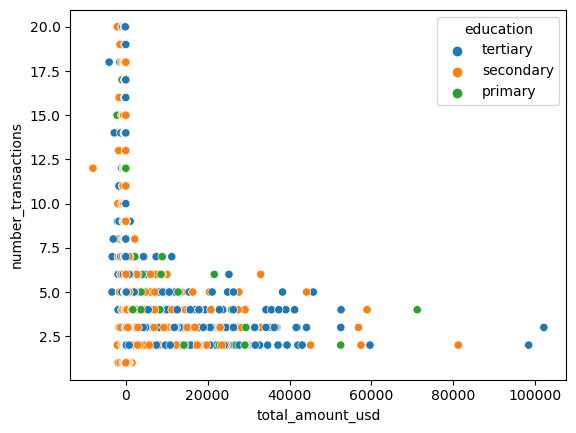

In [18]:
sns.scatterplot(data=dataUser, x = 'total_amount_usd', y='number_transactions', hue='education');

## generate bar charts for job

In [21]:
userJobDist = dataUser['job'].value_counts(dropna=False) # kalau dropna True maka Nan --> None tidak muncul

userJobDist

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
None              288
Name: job, dtype: int64

Text(0, 0.5, 'Jumlah job')

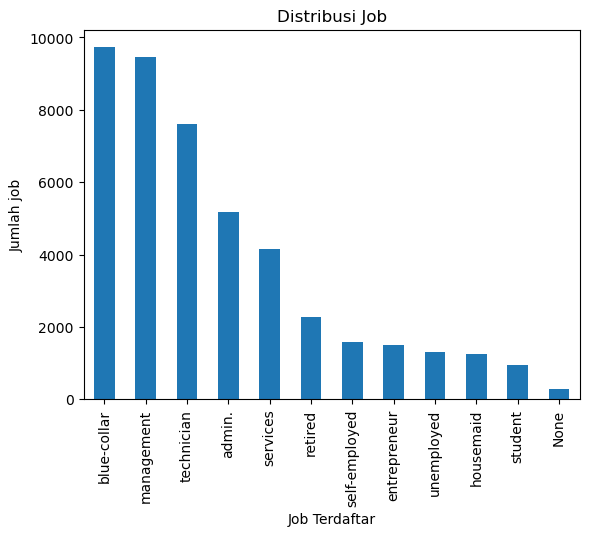

In [26]:
userJobDist.plot(kind='bar');
plt.title('Distribusi Job');
plt.xlabel('Job Terdaftar')
plt.ylabel('Jumlah job')

Text(0, 0.5, 'Job Terdaftar')

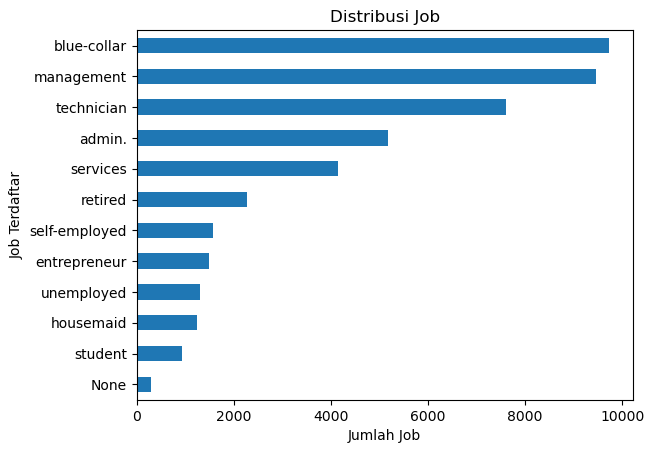

In [52]:
ujdSortedAsc= userJobDist.sort_values(ascending=True)
ujdSortedAsc.plot(kind='barh');
plt.title('Distribusi Job');
plt.xlabel('Jumlah Job')
plt.ylabel('Job Terdaftar')

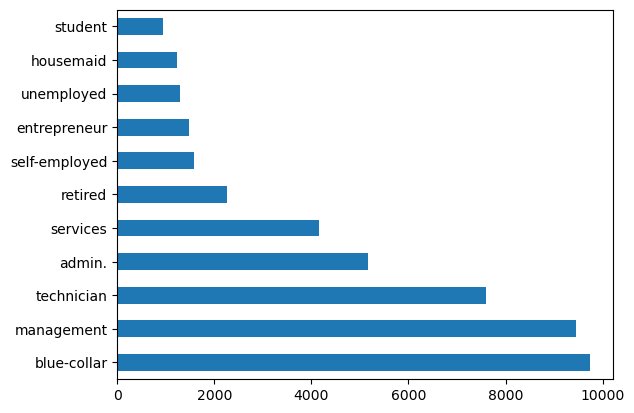

In [32]:
dataUser['job'].value_counts().plot(kind='barh');

## generate bar marital

In [34]:
maritalDist = dataUser['marital'].value_counts(dropna=False)

maritalDist

married     27212
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0, 0.5, 'Status Terdaftar')

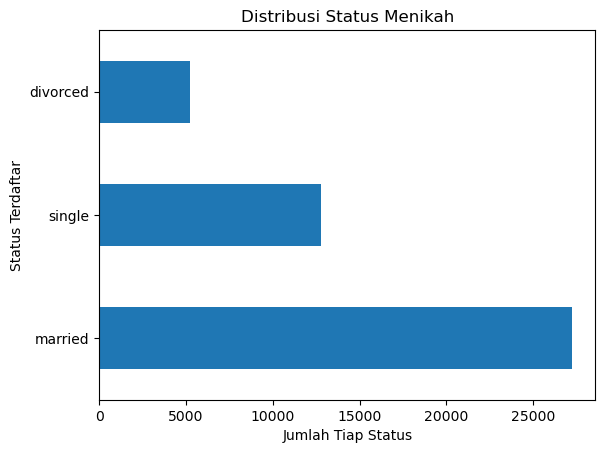

In [35]:
maritalDist.plot(kind='barh');
plt.title('Distribusi Status Menikah');
plt.xlabel('Jumlah Tiap Status')
plt.ylabel('Status Terdaftar')

## Genarate bar education

In [36]:
eduDist = dataUser['education'].value_counts(dropna=False)

eduDist

secondary    23202
tertiary     13300
primary       6850
None          1857
Name: education, dtype: int64

Text(0.5, 0, 'Jenjang Pendidikan Terdaftar')

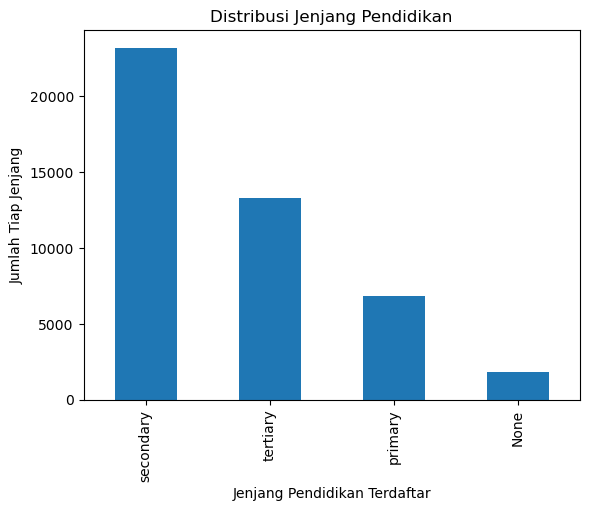

In [38]:
eduDist.plot(kind='bar');
plt.title('Distribusi Jenjang Pendidikan');
plt.ylabel('Jumlah Tiap Jenjang')
plt.xlabel('Jenjang Pendidikan Terdaftar')

## Generate Bar Contact

In [43]:
contactDist = dataUser['contact'].value_counts(dropna=False)

contactDist

cellular     29285
None         13018
telephone     2906
Name: contact, dtype: int64

Text(0.5, 0, 'Jenis Kepemilikan Kontak')

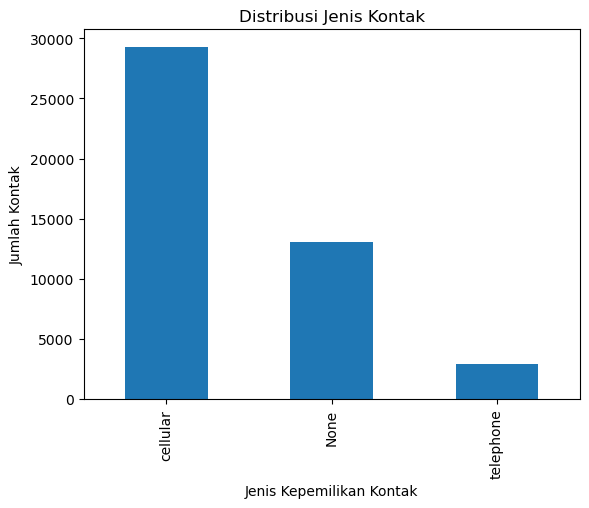

In [44]:
contactDist.plot(kind='bar');
plt.title('Distribusi Jenis Kontak');
plt.ylabel('Jumlah Kontak')
plt.xlabel('Jenis Kepemilikan Kontak')

## bar chart Poutcome

In [45]:
poutDist = dataUser['poutcome'].value_counts(dropna=False)

poutDist

None       36957
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Text(0.5, 0, 'Jenis Poutcome')

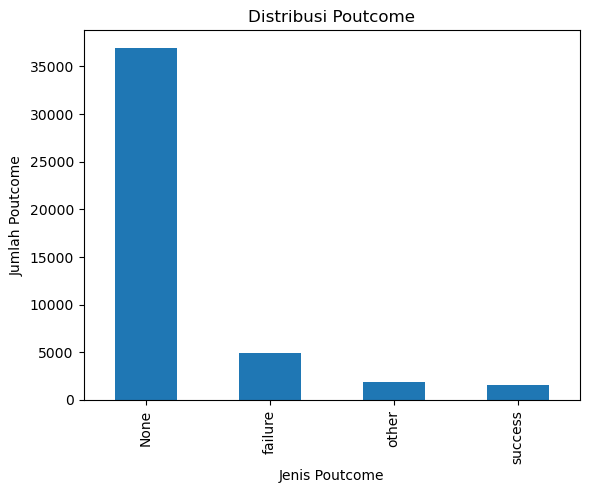

In [47]:
poutDist.plot(kind='bar');
plt.title('Distribusi Poutcome');
plt.ylabel('Jumlah Poutcome')
plt.xlabel('Jenis Poutcome')

## Bar Deafult

In [48]:
defaDist = dataUser['default'].value_counts(dropna=False)

defaDist

False    44394
True       815
Name: default, dtype: int64

Text(0.5, 0, 'Jenis Default')

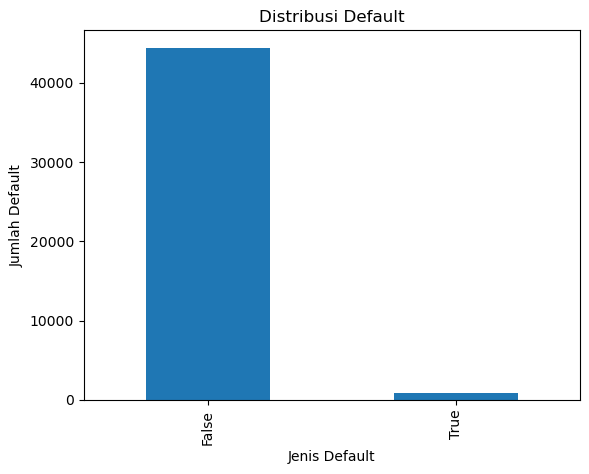

In [49]:
defaDist.plot(kind='bar');
plt.title('Distribusi Default');
plt.ylabel('Jumlah Default')
plt.xlabel('Jenis Default')

## Bar Device

In [50]:
deviceDist = dataUser['device'].value_counts(dropna=False)

deviceDist

mobile     27504
desktop    12112
tablet      5499
None          94
Name: device, dtype: int64

Text(0.5, 0, 'Jenis Device')

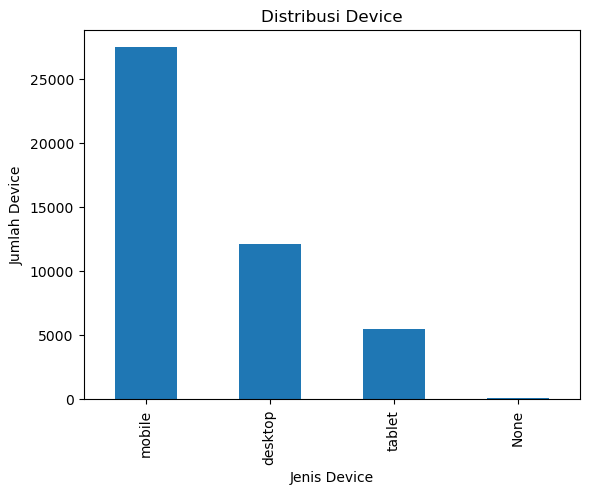

In [51]:
deviceDist.plot(kind='bar');
plt.title('Distribusi Device');
plt.ylabel('Jumlah Device')
plt.xlabel('Jenis Device')

## generate heatmap for feature correlation

In [57]:
corr_matrix = dataUser.corr().round(2)
corr_matrix

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.00,-0.16,-0.01,0.14,0.03,0.08,-0.02,0.03,-0.03,-0.02,-0.05
total_amount_usd,-0.16,1.00,0.10,-0.07,-0.07,-0.08,0.02,-0.02,0.01,0.02,0.05
age,-0.01,0.10,1.00,-0.02,-0.19,-0.02,-0.00,0.00,-0.02,0.00,0.03
default,0.14,-0.07,-0.02,1.00,-0.01,0.08,-0.01,0.02,-0.03,-0.02,-0.02
housing,0.03,-0.07,-0.19,-0.01,1.00,0.04,0.01,-0.02,0.12,0.04,-0.14
loan,0.08,-0.08,-0.02,0.08,0.04,1.00,-0.01,0.01,-0.02,-0.01,-0.07
duration,-0.02,0.02,-0.00,-0.01,0.01,-0.01,1.00,-0.08,-0.00,0.00,0.39
campaign,0.03,-0.02,0.00,0.02,-0.02,0.01,-0.08,1.00,-0.09,-0.03,-0.07
pdays,-0.03,0.01,-0.02,-0.03,0.12,-0.02,-0.00,-0.09,1.00,0.45,0.10
previous,-0.02,0.02,0.00,-0.02,0.04,-0.01,0.00,-0.03,0.45,1.00,0.09


<AxesSubplot:>

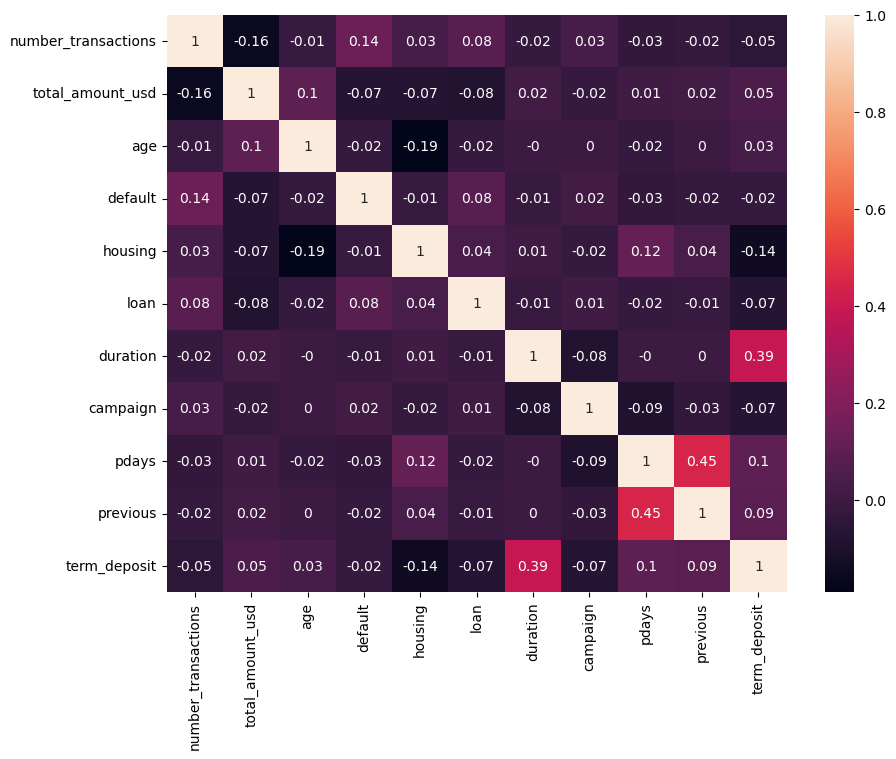

In [59]:
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix,annot=True)

Text(0.5, 1.0, 'Correlation Plot')

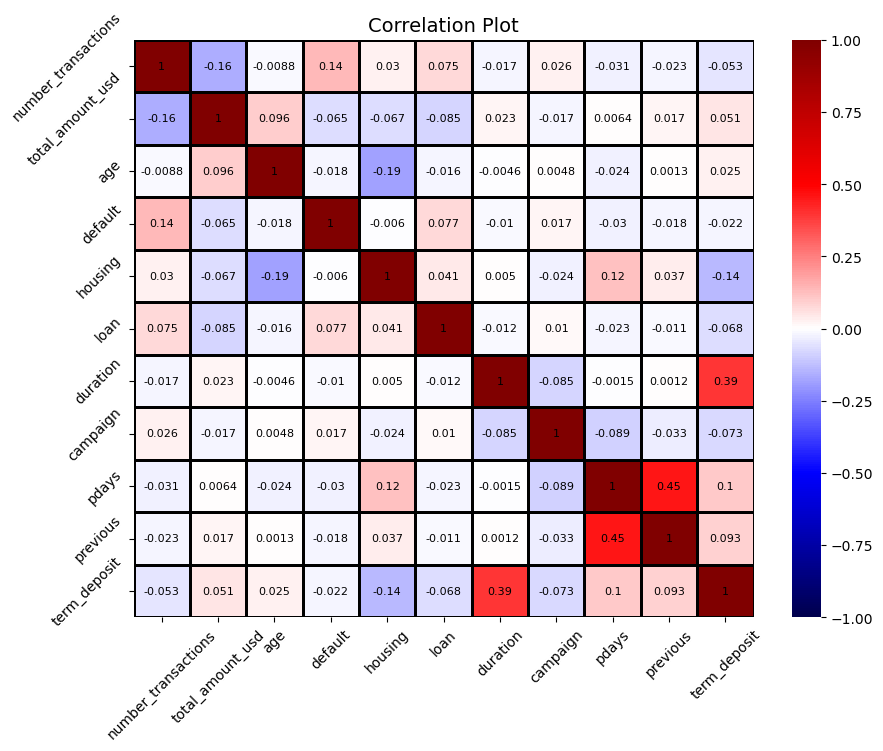

In [61]:
corrMatrixReadable = dataUser.corr()
fig = plt.figure(figsize=(10,7.5))

sns.heatmap(corrMatrixReadable, cmap='seismic', linewidths=0.75, linecolor='black', cbar=True, vmin=-1, vmax=1, annot=True,
annot_kws={'size': 8, 'color': 'black'})
plt.tick_params(labelsize=10, rotation=45)
plt.title('Correlation Plot', size=14)

cara membaca heatmap di atas adalah:
1. angka 1 diagonal menunjukkan nilai korelasi terhadap dirinya sendiri
2. sesuai indeks warna, maka warna gelap menunjukkan korelasi yang kuat di antara variabel-variabel terkait
3. korelasi kuat dan tidak kuat dilihat dari konteksnya

## identify missing values

In [64]:
dataUser.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

## percentage missing values

In [65]:
percentage_missing = dataUser.isnull().mean()

percentage_missing

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

## generate missing value report

In [71]:
def missing_value_pct_df(data):
    percent_missing = data.isnull().mean()
    missing_value_df = pd.DataFrame(percent_missing).reset_index()

    missing_value_df = missing_value_df.rename(columns={'index': 'column_name', 0: 'percent_missing'})

    missing_value_df['percentage_missing'] = missing_value_df['percent_missing'].apply(lambda x: round(x * 100, 2))


    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending=False)

    return missing_value_df

In [83]:
missing_value_df  = missing_value_pct_df(dataUser)

missing_value_df

,column_name,percent_missing,percentage_missing
15,poutcome,0.817470,81.75
10,contact,0.287952,28.80
2,total_amount_usd,0.221173,22.12
1,number_transactions,0.221173,22.12
6,education,0.041076,4.11
4,job,0.006370,0.64
18,device,0.002079,0.21
17,date_joined,0.000664,0.07
12,campaign,0.000000,0.00
16,term_deposit,0.000000,0.00


## remove features with a high percetage of missing values

In [88]:
threshold = 80

cols_to_drop = list(missing_value_df[missing_value_df['percentage_missing'] > threshold]['column_name'])

print("Jumlah fitur yang dihapus: ", missing_value_df[missing_value_df['percentage_missing'] > threshold].shape[0])

print(f'Fitur dengan missing values lebih besar dari {threshold}%: ', cols_to_drop)

Jumlah fitur yang dihapus:  1
Fitur dengan missing values lebih besar dari 80%:  ['poutcome']


In [89]:

user_data_cleaned = dataUser.drop(cols_to_drop, axis=1)

missing_columns = list(missing_value_df[missing_value_df['percentage_missing'] > 0]['column_name'])

print("Jumlah fitur dengan missing values: ", len(missing_columns))

Jumlah fitur dengan missing values:  8


## identify numerical data with missing values

In [91]:
dtypes = ['int64', 'float64']

numerical_columns = list(user_data_cleaned.select_dtypes(dtypes).columns)

print('numerical features with missing values: ', list(set(numerical_columns).intersection(missing_columns)))

numerical features with missing values:  ['number_transactions', 'total_amount_usd']


## impute missing data values for total_amount_usd

In [92]:
# cari sample user dengan missing value

sample_user = user_data_cleaned[user_data_cleaned['total_amount_usd'].isnull()].sample(1).user_id

sample_user

5635    a5c66cdd-439e-490c-b3b6-80555860cf5c
Name: user_id, dtype: object

In [100]:
# cetak mean of total_amount_usd

print("Mean total_amount_usd: ", round(user_data_cleaned['total_amount_usd'].mean(),2))

# impute missing values for total_amount_usd with mean alias mengisi semua total_amount_usd yang null dengan nilai mean

user_data_cleaned['total_amount_usd'].fillna(round(user_data_cleaned['total_amount_usd'].mean(),2), inplace=True)

Mean total_amount_usd:  1369.42


In [99]:
# memastikan sudah terisi
user_data_cleaned[user_data_cleaned.user_id.isin(sample_user)]['total_amount_usd']

5635    1369.42
Name: total_amount_usd, dtype: float64

## replace missing values for number transactions with 0

In [96]:
user_data_cleaned['number_transactions'].fillna(0, inplace=True)

In [97]:
user_data_cleaned[user_data_cleaned.user_id.isin(sample_user)]['number_transactions']

5635    0.0
Name: number_transactions, dtype: float64

## identify categorical data with missing values

In [98]:
categorical_columns = list(user_data_cleaned.select_dtypes(['object']).columns)

print('categorical features with missing values: ', list(set(categorical_columns).intersection(missing_columns)))

categorical features with missing values:  ['education', 'job', 'device', 'contact']


## replace categorical missing values with unknown

In [101]:
user_data_cleaned.device.fillna('Unknown', inplace=True)
user_data_cleaned.education.fillna('Unknown', inplace=True)
user_data_cleaned.contact.fillna('Unknown', inplace=True)
user_data_cleaned.job.fillna('Unknown', inplace=True)

In [102]:
user_data_cleaned.device.value_counts()

mobile     27504
desktop    12112
tablet      5499
Unknown       94
Name: device, dtype: int64

## check if there are any other missing values

In [103]:
missing_value_df = missing_value_pct_df(user_data_cleaned)
missing_columns = list(missing_value_df[missing_value_df['percentage_missing'] > 0]['column_name'])

print("Jumlah fitur dengan missing values: ", len(missing_columns))
print("Fitur-fitur dengan missing values: ", missing_columns)

Jumlah fitur dengan missing values:  1
Fitur-fitur dengan missing values:  ['date_joined']


## Remove all rows where date_joined is missing

In [106]:
print("Jumlah user yang corrupted data", user_data_cleaned[user_data_cleaned['date_joined'].isnull()].shape[0])

Jumlah user yang corrupted data 30


In [114]:
# remove corrupted data

user_data_cleaned = user_data_cleaned[~user_data_cleaned['date_joined'].isnull()]

In [115]:
# ceck ada data corrupted lainnya tersisa

print("Number of users with corrupted data: ", users_data_cleaned[users_data_cleaned['date_joined'].isnull()].shape[0])

Number of users with corrupted data:  0


## perform one last check missing values

In [116]:
missing_value_df = missing_value_pct_df(user_data_cleaned)
missing_columns = list(missing_value_df[missing_value_df['percentage_missing'] > 0]['column_name'])

print("Jumlah fitur dengan missing values: ", len(missing_columns))

Jumlah fitur dengan missing values:  0
